## Student Information

#### Name: Quoc Tri Tran (Collin)

#### Student ID: 108062891

#### Github ID: https://github.com/CollinTri/DM19-Lab1-Homework1

#### Kaggle name: Collin Tri

#### Kaggle private scoreboard snapshot: 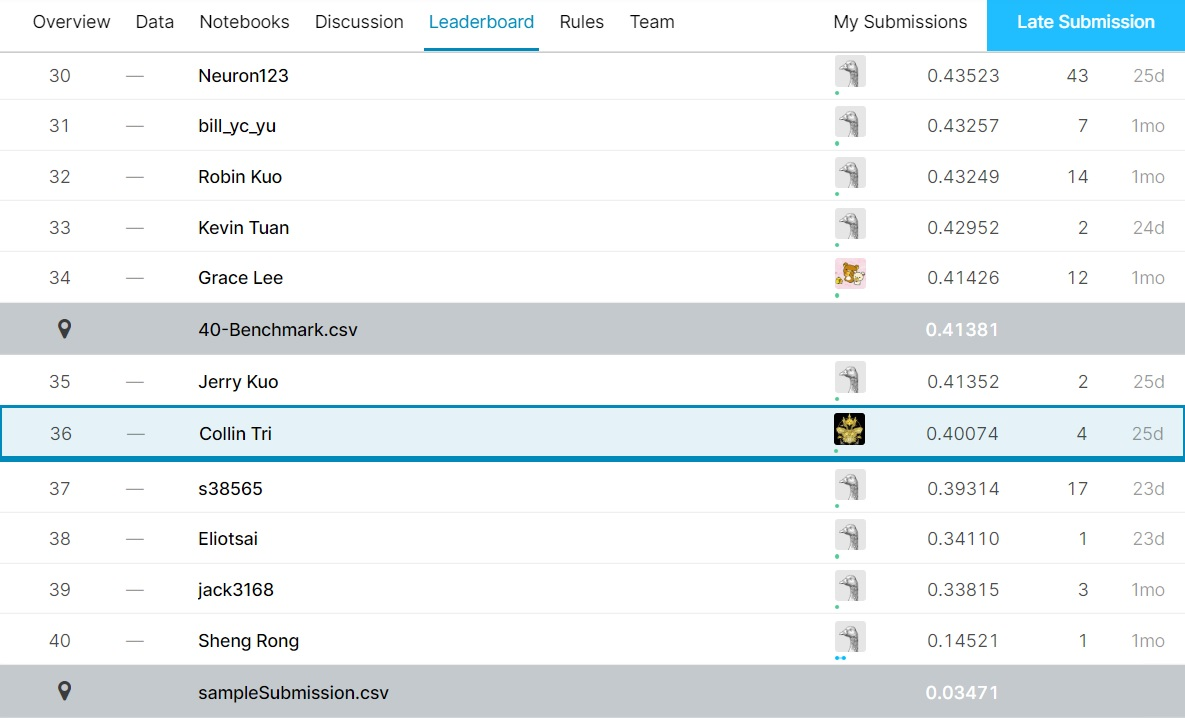

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [2]:
#### Take_Home_Exercise 01: Plot word frequency for Top 30 words in both train and test dataset. ####
#### Training dataset only ####

from sklearn.feature_extraction.text import CountVectorizer

train_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)

train_terms = train_count_vect.get_feature_names()
train_terms_sums = train_counts.sum(axis=0)

train_data = []
for col, term in enumerate(train_terms):
    train_data.append((term, train_terms_sums[0,col]))

train_ranking = pd.DataFrame(train_data, columns=['training_text','word_frequency'])
sorted_train_terms_df = train_ranking.sort_values('word_frequency', ascending=False)

sorted_train_terms_df[0:30]

,training_text,word_frequency
8930,the,1736
9119,to,1289
537,and,955
10051,you,796
6371,of,793
4546,is,787
4571,it,717
4383,in,626
8924,that,537
5957,my,535


In [3]:
#### Take_Home_Exercise 01: Plot word frequency for Top 30 words in both train and test dataset. ####
#### Testing dataset only ####

test_count_vect = CountVectorizer()
test_counts = test_count_vect.fit_transform(test_df.text)
test_terms = test_count_vect.get_feature_names()
test_terms_sums = test_counts.sum(axis=0)

test_data = []
for col, term in enumerate(test_terms):
    test_data.append((term, test_terms_sums[0,col]))

test_ranking = pd.DataFrame(test_data, columns=['test_text','word_frequency'])
sorted_test_terms_df = test_ranking.sort_values('word_frequency', ascending=False)

sorted_test_terms_df[0:30]

,test_text,word_frequency
1687,the,153
1739,to,138
99,and,92
1240,of,83
909,it,83
1938,you,82
903,is,77
867,in,69
655,for,57
1686,that,55


In [4]:
#### Take_Home_Exercise 01: Plot word frequency for Top 30 words in both train and test dataset. ####
#### Training dataset and Testing dataset concatenate together ####

whole_df = pd.concat([train_df, test_df], ignore_index=True)
whole_count_vect = CountVectorizer()
whole_counts = whole_count_vect.fit_transform(whole_df.text)
whole_terms = whole_count_vect.get_feature_names()
whole_terms_sums = whole_counts.sum(axis=0)

whole_data = []
for col, term in enumerate(whole_terms):
    whole_data.append((term, whole_terms_sums[0,col]))

whole_ranking = pd.DataFrame(whole_data, columns=['whole_text','word_frequency'])
sorted_whole_terms_df = whole_ranking.sort_values('word_frequency', ascending=False)

sorted_whole_terms_df[0:30]

,whole_text,word_frequency
9525,the,1889
9733,to,1427
576,and,1047
10725,you,878
6814,of,876
4853,is,864
4879,it,800
4681,in,695
9519,that,592
6363,my,587


In [5]:
#### Take_Home_Exercise 02: Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110] ####
#### observe some feature names of training dataset ####
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

train_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
train_vect.fit(train_df['text'])
train_data_BOW_features = train_vect.transform(train_df['text'])

train_feature_names = train_vect.get_feature_names()
train_feature_names[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

In [6]:
#### Take_Home_Exercise 02: Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110] ####
#### observe some feature names of testing dataset ####
test_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
test_vect.fit(test_df['text'])
test_data_BOW_features = test_vect.transform(test_df['text'])

test_feature_names = test_vect.get_feature_names()
test_feature_names[100:110]

['angry',
 'angryman',
 'animated',
 'another',
 'answers',
 'anushkasharma',
 'anxiety',
 'anxietyproblems',
 'any',
 'apocalypse']

In [7]:
#### Take_Home_Exercise 03: Inteprete the result ####

"""
From the Classification precision: this method has best performance in classifying 'joy' emotion.
From the f1-score: performance of this model is just average in classifying all emotion classes.
From macro_avg and weighted_avg: 'label_imbalance' does not affect the precision and recall averages of this model, 
    i.e. there is no situation of 'label_imbalance'.
From confusion matrix: highest TP value comes to classifying 'fear'but due to larger value of support compare to other 
    emotions, precision value is reduced.
"""

"\nFrom the Classification precision: this method has best performance in classifying 'joy' emotion.\nFrom the f1-score: performance of this model is just average in classifying all emotion classes.\nFrom macro_avg and weighted_avg: 'label_imbalance' does not affect the precision and recall averages of this model, \n    i.e. there is no situation of 'label_imbalance'.\nFrom confusion matrix: highest TP value comes to classifying 'fear'but due to larger value of support compare to other \n    emotions, precision value is reduced.\n"

In [8]:
#### Take_Home_Exercise 04: Naive Bayes model training and predicting ####
#### using Lab version's setting to compare: BOW CountVectorizer with 500 features ####

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])

## Preparing training and testing data
X_NB_train = BOW_500.transform(train_df['text'])
y_NB_train = train_df['emotion']

X_NB_test = BOW_500.transform(test_df['text'])
y_NB_test = test_df['emotion']

## build Naive Bayes model
NB_model = MultinomialNB()

## performing training process
NB_model.fit(X_NB_train, y_NB_train)

## performing predicting process
y_NB_train_pred = NB_model.predict(X_NB_train)
y_NB_test_pred = NB_model.predict(X_NB_test)

## computing accuracy score
acc_NB_train = accuracy_score(y_true=y_NB_train, y_pred=y_NB_train_pred)
acc_NB_test = accuracy_score(y_true=y_NB_test, y_pred=y_NB_test_pred)

print('training accuracy: {}'.format(round(acc_NB_train, 2)))
print('testing accuracy: {}'.format(round(acc_NB_test, 2)))

"""comparing to DecisionTree model, although NB model has lower training accuracy but it improves testing accuracy, which is
actual useful metric we aimed at when dealing with unseen new dataset."""

training accuracy: 0.79
testing accuracy: 0.72


'comparing to DecisionTree model, although NB model has lower training accuracy but it improves testing accuracy, which is\nactual useful metric we aimed at when dealing with unseen new dataset.'

In [9]:
#### Take_Home_Exercise 05: Naive Bayes model compare to Decision Tree model (precision, recall, f1-score) ####
#### Using the Lab version's setting: BOW CountVectorizer with 500 features ####
from sklearn.metrics import classification_report

print(classification_report(y_true=y_NB_test, y_pred=y_NB_test_pred))

""" Compare to Decision Tree model: there are slightly improvements of precision score in classifying all emotion classes.
Also, by considering f1-score, all values indicates that Naive Bayes raise more superior performance than Decision Tree model.
A minor withdraw is that Naive Bayes model show some reflection in 'label_imbalance' """

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



" Compare to Decision Tree model: there are slightly improvements of precision score in classifying all emotion classes.\nAlso, by considering f1-score, all values indicates that Naive Bayes raise more superior performance than Decision Tree model.\nA minor withdraw is that Naive Bayes model show some reflection in 'label_imbalance' "

In [10]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from keras.callbacks import CSVLogger
from sklearn.metrics import accuracy_score
import numpy as np

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## deal with label (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# I/O setting
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# show model construction
model.summary()

#### Training the Deep Learning NN ####

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger], validation_data = (X_test, y_test))

#### Predict on testing dataset ####

pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

# training log (Accuracy and Loss)
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log.accuracy

Using TensorFlow backend.


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1858       fear
2181        joy
1705       fear
3225    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)       

0     0.368115
1     0.650152
2     0.802103
3     0.849986
4     0.887628
5     0.913645
6     0.929422
7     0.944368
8     0.954055
9     0.961251
10    0.966233
11    0.966233
12    0.968447
13    0.973429
14    0.973152
15    0.973429
16    0.975367
17    0.976474
18    0.975643
19    0.974813
20    0.977858
21    0.977027
22    0.979242
23    0.978411
24    0.978965
Name: accuracy, dtype: float64

In [11]:
#### Take_Home_Exercise 06: Naive Bayes model compare to Decision Tree model (precision, recall, f1-score) ####

import matplotlib.pyplot as plt
import numpy as np

x1 = training_log.epoch
y1 = training_log.accuracy

x2 = training_log.epoch
y2 = training_log.val_accuracy

x3 = training_log.epoch
y3 = training_log.loss

x4 = training_log.epoch
y4 = training_log.val_loss

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.title.set_text('Training Accuracy per epoch')
ax1.set(xlabel='epoch')
ax1.set(ylabel='Accuracy')
l1 = ax1.plot(x1,y1, color='r', label='Train Accuracy')
l2 = ax1.plot(x2,y2, color='b', label='Val Accuracy')
ax1.legend(loc="upper right")

ax2.title.set_text('Training Loss per epoch')
ax2.set(xlabel='epoch')
ax2.set(ylabel='Loss')
l3 = ax2.plot(x3,y3, color='g', label='Train Loss')
l4 = ax2.plot(x4,y4, color='purple', label='Val Loss')
ax2.legend(loc="upper right")

plt.subplots_adjust(top=1, bottom=0.08, left=0.1, right=0.95, hspace=0.1, wspace=0.5)
plt.show()

""" Both Training Accuracy and Validation Accuracy come to stable states by the 5 epoch. Training Accuracy stays way higher
than Validation Accuracy. In combining of Accuracy and Loss, Overfitting starts at about the 4th epoch where validation Loss
started to increase dramatically """

<Figure size 1200x400 with 2 Axes>

' Both Training Accuracy and Validation Accuracy come to stable states by the 5 epoch. Training Accuracy stays way higher\nthan Validation Accuracy. In combining of Accuracy and Loss, Overfitting starts at about the 4th epoch where validation Loss\nstarted to increase dramatically '

In [12]:
#### Take_Home_Exercise 07: How to utilize word vectors for representing sentence and train a model ####

""" One possible option of utilizing the word vectors to represent sentences as well as train the model is using doc2vec
model in gensim, although there is already an in-build word2vec function in doc2vec, as showed below """

#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

data = train_df['text']

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=["sentence" + str(i)]) for i, _d in enumerate(data)]

max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

c:\users\solo_\appdata\local\programs\python\python36\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


c:\users\solo_\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

In [13]:
#### Take_Home_Exercise 07: How to utilize word vectors for representing sentence and train a model ####
#### application of the trained model for constructed doc2vec model above ####

from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")

#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print(v1)

# to find most similar sentence(doc) using tags of sentence 2
similar_doc = model.docvecs.most_similar(positive= 'sentence2', negative=None, topn=10, indexer=None)
print("similar doc: ",similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['sentence1'])

[-0.04222092 -0.03904209 -0.07763825  0.05870985  0.00222152 -0.04295484
  0.01462417  0.00188417 -0.02938027  0.04220077 -0.01691653  0.00160863
  0.01762149 -0.08502784 -0.00217758  0.01552069 -0.07009082  0.00681332
 -0.00694891  0.07895433]
similar doc:  [('sentence929', 0.973817765712738), ('sentence1904', 0.8047905564308167), ('sentence1011', 0.7975006103515625), ('sentence3085', 0.782600998878479), ('sentence2812', 0.7590489983558655), ('sentence3356', 0.7553699612617493), ('sentence634', 0.7473395466804504), ('sentence1535', 0.745236873626709), ('sentence585', 0.7414520978927612), ('sentence323', 0.7412784099578857)]
[ 0.5447477  -3.5413175  -0.6051167   2.8277647  -1.9731133   1.0472807
 -0.96480286 -3.8236444  -0.06593084  0.6231755   2.3773508  -1.5325768
  1.8241574  -0.02234107  1.3941602   3.8988972  -6.4892097   3.4842627
  1.538342    5.768708  ]


In [14]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "D:\PhD Related\PhD courses related\Others\Data Mining Lab Assignments\DMLab2\DM19-Lab2-Master\GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [15]:
w2v_google_model.most_similar('happy', topn=10)

[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

In [16]:
#### Take_Home_Exercise 08: t-SNE visualisation of 15 words most related to the words "angry", "happy", "sad", "fear" ####

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


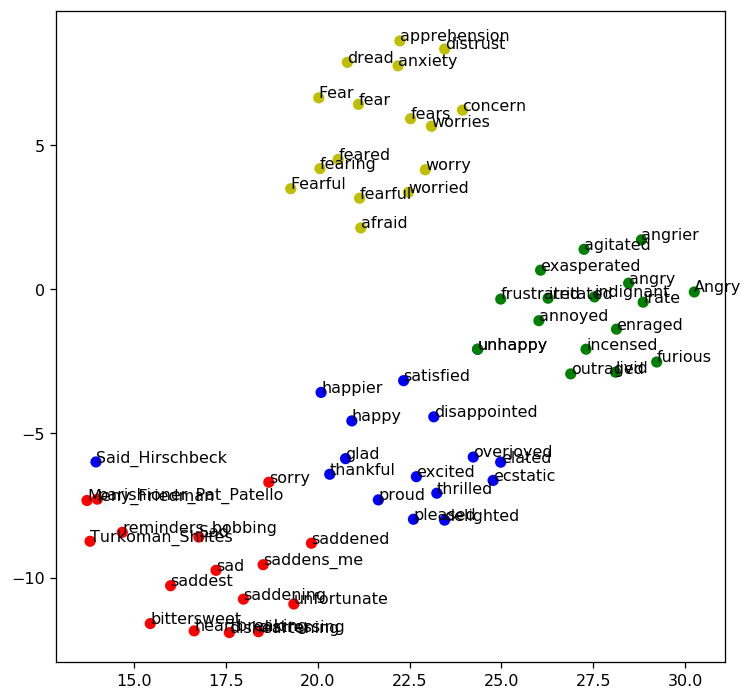

In [17]:
#### Take_Home_Exercise 08: plot dataset with t-SNE ####

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Kaggle Competition Report

## Data preparation:

#### ** step 1: Read-in and seperate attributes of dataset Tweet_DN.json to dataframe

after this step, main part of tweets dataset including tweet_id, text, hashtag, score, crawldate and types are already loaded into dataframe and is ready to be processed.

In [ ]:
import re # for regular expressions
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

origin_data = pd.read_json(path_or_buf="tweets_DM.json", orient=None,
                           typ='frame', dtype=True, convert_axes=True, 
                           convert_dates=True, keep_default_dates=True, 
                           numpy=False, precise_float=False, date_unit=None, 
                           encoding=None, lines=True, chunksize=None, 
                           compression='infer')
                           
score = origin_data._score.values
source = origin_data._source.values
crawldate = origin_data._crawldate.values
types = origin_data._type.values

source = origin_data._source.values
tweet_id = []
hashtags = []
text = []
for index in range(len(source)):
    hashtags.append(source[index].get('tweet').get('hashtags'))
    tweet_id.append(source[index].get('tweet').get('tweet_id'))
    text.append(source[index].get('tweet').get('text'))
    
json_df = pd.DataFrame()
json_df['tweet_id']  = tweet_id
json_df['hashtags']  = hashtags
json_df['text']  = text
json_df['score']  = score
json_df['crawldate']  = crawldate
json_df['types']  = types

#### ** step 2: Read in and join data from data_identification.csv and emotion.csv using tweet_id as prepation for next step of joining with current dataframe.

data within these 2 csv files are labels to define sentiment of each scawled tweet and its assigned group of either "train" or "test"

In [ ]:
tweets_id  = pd.read_csv('data_identification.csv')
emotion_of_labeled_tweets = pd.read_csv('emotion.csv')
dfinal = tweets_id.merge(emotion_of_labeled_tweets, how='outer', left_on='tweet_id', right_on='tweet_id')

#### ** step 3: join 2 obtained dataframes above to form complete original dataset before further processing: 

This complete dataset is saved as pickle file for backup purpose

In [ ]:
import pickle

whole_data = dfinal.merge(json_df, how = 'outer', left_on='tweet_id', right_on='tweet_id')
infile = open('whole_data.pkl','rb')

## Reload pickle value to check its accuracy
new_dict = pickle.load(infile)
infile.close()
new_dict

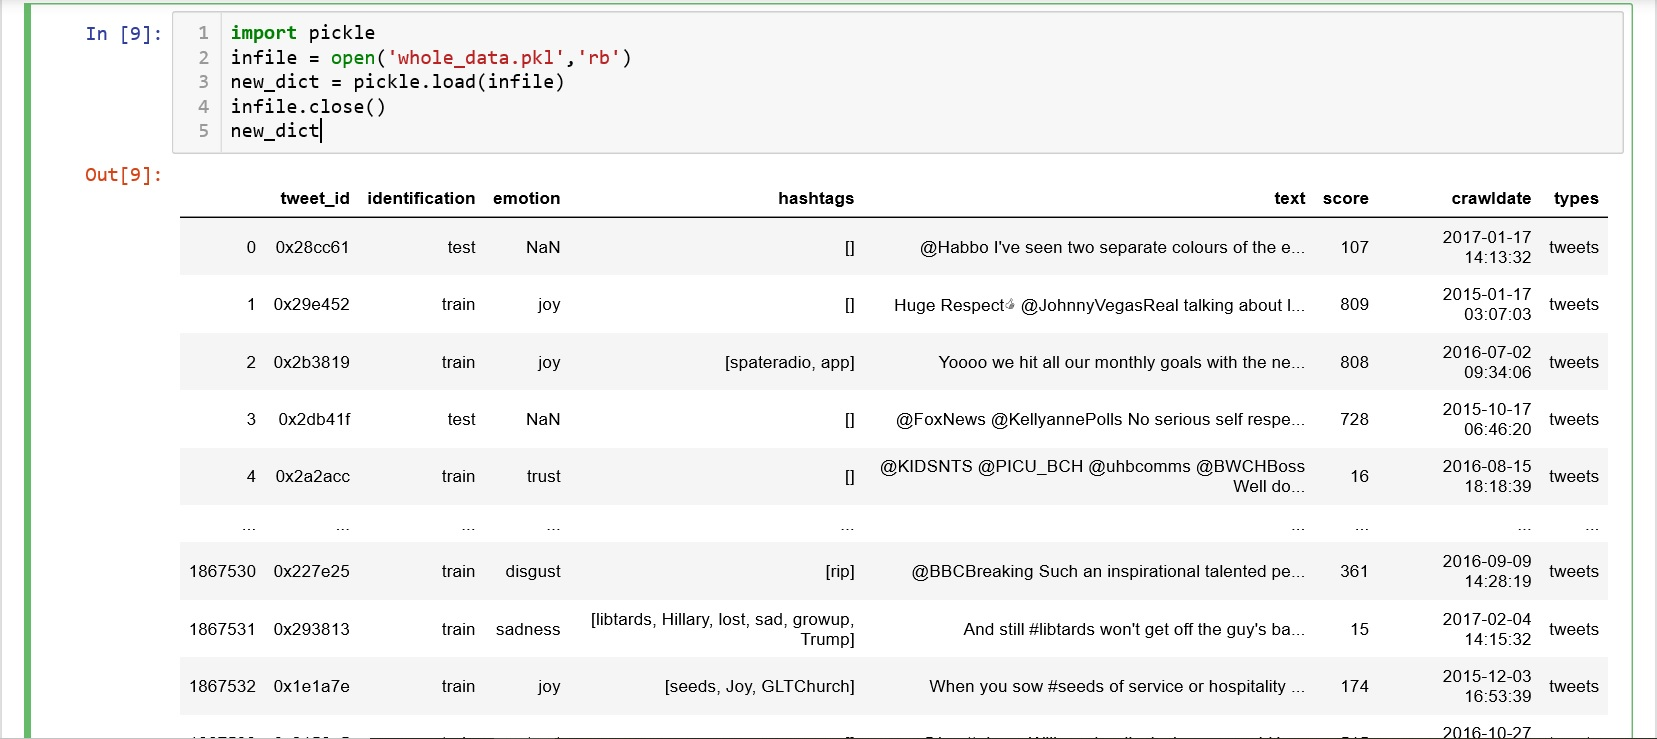

#### ** step 4: seperate original whole dataset into training and testing dataset and save all 3 datasets to csv

In [ ]:
whole_tweet_train_df = whole_data[whole_data['identification'] == 'train']
whole_tweet_test_df = whole_data[whole_data['identification'] == 'test']

whole_data.to_csv('whole_data.csv')
whole_tweet_train_df.to_csv('train_data.csv')
whole_tweet_test_df.to_csv('test_data.csv')

## Data Preprocessing

#### ** step 1: data summary and observation

First step is to have a glance on the distribution of sentence's length in each dataset and have a comparision

In [ ]:
length_train = whole_tweet_train_df['text'].str.len()
length_test = whole_tweet_test_df['text'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

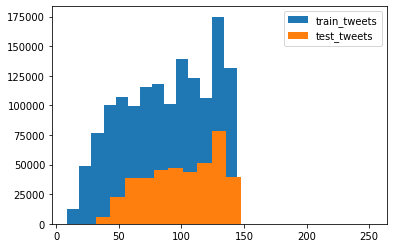

** step 2: start from performing processing steps on training dataset. Firstly, define function to remove terms such as @abc, #abd and messy symbol from text and perform cleaning step

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

clean_training_df = whole_tweet_train_df
clean_training_df['text'] = np.vectorize(remove_pattern)(clean_training_df['text'], "@[\w]*")
clean_training_df['text'] = clean_training_df['text'].str.replace("[^a-zA-Z#]", " ")

** step 3: remove words that have less than 3 characters since most of those words are believed to have no contribution to meaning of sentence (which later is figured out to be a wrong belief), then join the rest of words together using a space to seperate, before doing words tokenizing

In [ ]:
clean_training_df['text'] = clean_training_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = clean_training_df['text'].apply(lambda x: x.split()) # tokenizing

** step 4: doing stemming and re-join stemmed, tokenized words to form set of all qualified words, ready for features extraction steps

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
clean_training_df['text'] = tokenized_tweet

## Features Extraction

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(clean_training_df['text'])

### Bag Of Word Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(clean_training_df['text'])

### Word2Vec features extraction - model training and performing extraction

** step 1: let word2vec model learn from training dataset

In [ ]:
tokenized_tweet = clean_training_df['text'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(clean_training_df['text']), epochs=20)

** step 2: using trained model to define word to vector converting function and convert words set to features vector, then save the result to wordvec_df dataframe for next step classification training use.

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary       
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)

## Classification Model 

### Logistic Regression on TFIDF features vector

** step 1: spliting the TFIDFVectorizer extracted vectors from training dataset into training and validating set of data using sklearn.model_selection package function: train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_tfidf = tfidf[:1455563,:]
test_tfidf = tfidf[1455563:,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, clean_training_df['emotion'],  
                                                          random_state=42, 
                                                          test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average='micro') # calculating f1 score

the validating score was 0.47508295757198243

** step 2: generating first submission csv to try on kaggle

In [ ]:
test_pred = lreg.predict(test_tfidf)
test['label'] = test_pred
submission = test[['tweet_id','label']]
submission.to_csv('prediction_tfidf_logistic_regression.csv', index=False) # writing data to a CSV file

first kaggle score was about 0.38, so low score!!!

### Logistic Regression on word2vec vectorizer

** step 1: split the feature vectors into training and validating dataset and train on model

In [ ]:
train_w2v = wordvec_df.iloc[:1455563,:]
test_w2v = wordvec_df.iloc[1455563:,:]

# splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['emotion'],  
                                                          random_state=42, 
                                                          test_size=0.3)

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='macro') # calculating f1 score

the validating score was 0.47695393994077895

** step 2: create submission file and second trial on kaggle

In [ ]:
test_pred = lreg.predict(test_w2v)
test['label'] = test_pred
submission = test[['tweet_id','label']]
submission.to_csv('prediction_w2v_logistic_regression.csv', index=False) # writing data to a CSV file

second kaggle score was about 0.4, still low!!!

## Other Classification Model Used

### 1. Logistic Regression on Bag of Word Vectorizer

In [ ]:
train_bow = bow[:1455563,:]
test_bow = bow[1455563:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['emotion'],  
                                                          random_state=42, 
                                                          test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set
f1_score(yvalid, prediction, average='micro') # calculating f1 score

validating score was 0.47374098001003045

### 2. ktrain model as implementation of Bert Model (uncased_L-12_H-768_A-12) (not being able to submit due to exceeding Kaggle time limit)

### 3. RandomForest Classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Gained Insights

There are several categories of methods to deal with specific sentence-classification tasks:

1. Multi-class classification (as in this competition): each sentence can only has 1 label but there are more than 2 labels to choose from.
2. Multi-label classification (as in TBrain competition): each sentence might be classified into more than 1 label and there are 2 or more labels to choose from.

The main reasons that lead to inefficient classification in this practice are:

1. data cleaning steps were naively ignored sequence and relationship of words within sentence, as well as semantic meaning of punctuation, context of the sentence, in the way of joining all words from sentences to a single bag of word.
2. Classification models were naively supposed set of labels can be procceed by binary-classification, where sentences can be considered against labels every time by a pair of labels, which extremely ignored relationship between labels and probabilities of original sentences distribution among labels.
3. Knowledge base of models were learned from limited training dataset that is not sufficiently support in predicting incoming new entry data in the case it is totally different than prior knowledge of the model.
4. Absence of bidirectional processing and attention factors in learning process that cause the model not being able to learn semantic meaning of sentence thoroughly.